In [ ]:
# %%
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from fcnn import *
data = pd.read_csv(r'Group24\Group24\Regression\UnivariateData\24.csv', names=['x', 'y'])
X, Y = data.x, data.y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rec = {}

for eta in [0.1,0.01]:
    rec2 = {"train" : [], "val" : [], "test" : []}
    for neurons in [5,8,12,15]:
        FCNN = Model(eta,"regression")
        nodes_hidden_layer = neurons
        FCNN.add_layer(1)
        FCNN.add_layer(nodes_hidden_layer)
        # FCNN.add_layer(nodes_hidden_layer)
        FCNN.add_layer(1)

        errors = []
        previous_validation_error = 100
        inc_val_er_streak = 0
        while True:
            FCNN.fit(X_train.to_numpy().reshape(len(X_train),1), y_train.to_numpy().reshape(len(y_train),1))
            errors.append(FCNN.avg_training_error())
            if((len(errors)>1 and abs(errors[len(errors)-1]-errors[len(errors)-2])<0.00001) or len(errors)>500): break
            
            # Computing the validation error
            prediction = FCNN.classify_batch(X_val.to_numpy().reshape(len(X_val),1))
            current_validation_error = mean_squared_error(y_val, prediction)
            if(previous_validation_error < current_validation_error): 
                inc_val_er_streak += 1
                if(inc_val_er_streak >= 3): break
            inc_val_er_streak = 0        
            previous_validation_error = current_validation_error
            FCNN.total_error = []

        print("\n", "eta = {}, layer = {}".format(eta, neurons))
        # %%
        val_mse = 0
        # Classification of validation data
        predicted = FCNN.classify_batch(X_val.to_numpy().reshape(len(X_val),1))

        # Mean squared error
        val_mse = mean_squared_error(y_val, predicted)
        print("MSE (Validation data) = ", val_mse)

        # %%
        train_mse = 0
        # Classification of training data
        predicted = FCNN.classify_batch(X_train.to_numpy().reshape(len(X_train),1))

        # Mean squared error
        train_mse = mean_squared_error(y_train, predicted)
        print("MSE (training data) = ", train_mse)

        # %%
        test_mse = 0
        # Classification of testing data
        predicted = FCNN.classify_batch(X_test.to_numpy().reshape(len(X_test),1))

        # Mean squared error
        test_mse = mean_squared_error(y_test, predicted)
        print("MSE (testing data) = ", test_mse)

        rec2["train"].append(train_mse)
        rec2["val"].append(val_mse)
        rec2["test"].append(test_mse)
    rec[eta] = rec2
    


In [ ]:
X = ['5', '8', '12', '15']
plt.figure(figsize = (15,5))
plt.suptitle("Fig 2. MSE V/S Architecture", y=0.02, fontsize=15)
train = rec[0.1]["train"]
val = rec[0.1]["val"]
test = rec[0.1]["test"]
  
X_axis = np.arange(len(X))
plt.subplot(1, 2, 1)
plt.bar(X_axis - 0.3, train, 0.3, label = 'Training')
plt.bar(X_axis , val, 0.3, label = 'Validation')
plt.bar(X_axis + 0.3, test, 0.3, label = 'Testing')
  
plt.xticks(X_axis, X)
plt.xlabel("Neurons in hidden layer")
plt.ylabel("Mean Square Error")
plt.title("(a) eta = 0.1")
plt.legend()
plt.grid(True)

train = rec[0.01]["train"]
val = rec[0.01]["val"]
test = rec[0.01]["test"]
  
X_axis = np.arange(len(X))
plt.subplot(1, 2, 2)
plt.bar(X_axis - 0.3, train, 0.3, label = 'Training')
plt.bar(X_axis , val, 0.3, label = 'Validation')
plt.bar(X_axis + 0.3, test, 0.3, label = 'Testing')
  
plt.xticks(X_axis, X)
plt.xlabel("Neurons in hidden layer")
plt.ylabel("Mean Square Error")
plt.title("(b) eta = 0.01")
plt.legend()
plt.grid(True)
plt.show()

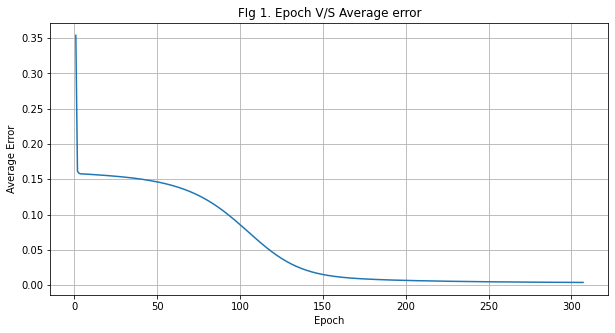

MSE (Validation data) =  0.00790778213416054
MSE (training data) =  0.007278434541667099
MSE (testing data) =  0.008382718993874156


In [1]:
# %%
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from fcnn import *
data = pd.read_csv(r'Group24\Group24\Regression\UnivariateData\24.csv', names=['x', 'y'])
X, Y = data.x, data.y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# %%

FCNN = Model(0.01,"regression")
nodes_hidden_layer = 15
FCNN.add_layer(1)
FCNN.add_layer(nodes_hidden_layer)
# FCNN.add_layer(nodes_hidden_layer)
FCNN.add_layer(1)

errors = []
previous_validation_error = 100
inc_val_er_streak = 0
while True:
    FCNN.fit(X_train.to_numpy().reshape(len(X_train),1), y_train.to_numpy().reshape(len(y_train),1))
    errors.append(FCNN.avg_training_error())
    if((len(errors)>1 and abs(errors[len(errors)-1]-errors[len(errors)-2])<0.00001) or len(errors)>500): break
    
    # Computing the validation error
    prediction = FCNN.classify_batch(X_val.to_numpy().reshape(len(X_val),1))
    current_validation_error = mean_squared_error(y_val, prediction)
    if(previous_validation_error < current_validation_error): 
        inc_val_er_streak += 1
        if(inc_val_er_streak >= 3): break
    inc_val_er_streak = 0        
    previous_validation_error = current_validation_error
    FCNN.total_error = []

# %%
# Epoch vs Avergae error
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,len(errors)+1)],errors)
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.title("FIg 1. Epoch V/S Average error")
plt.grid(True)
plt.show()

# %%
val_mse = 0
# Classification of validation data
predicted_val = FCNN.classify_batch(X_val.to_numpy().reshape(len(X_val),1))

# Mean squared error
val_mse = mean_squared_error(y_val, predicted_val)
print("MSE (Validation data) = ", val_mse)

# %%
train_mse = 0
# Classification of training data
predicted_train = FCNN.classify_batch(X_train.to_numpy().reshape(len(X_train),1))

# Mean squared error
train_mse = mean_squared_error(y_train, predicted_train)
print("MSE (training data) = ", train_mse)

# %%
test_mse = 0
# Classification of testing data
predicted_test = FCNN.classify_batch(X_test.to_numpy().reshape(len(X_test),1))

# Mean squared error
test_mse = mean_squared_error(y_test, predicted_test)
print("MSE (testing data) = ", test_mse)

# %%

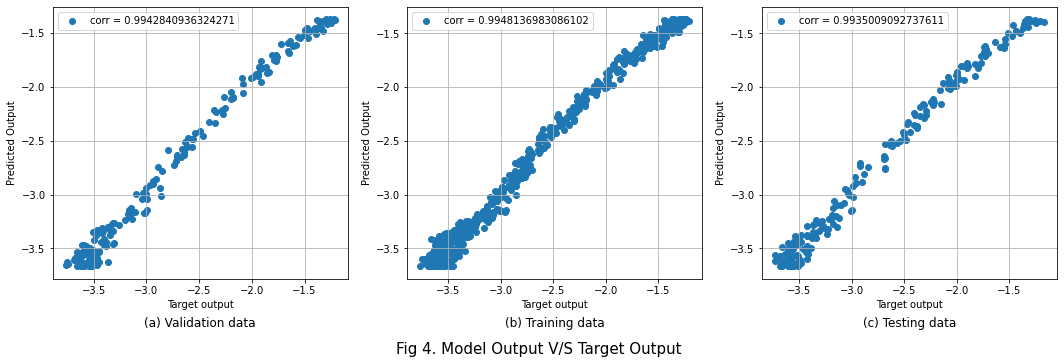

In [26]:

# Model output and target output for validation data
plt.figure(figsize=(18,5))
# plt.suptitle("Fig 3. Model Output and Target Output",y=-0.05, fontsize=15)
plt.suptitle("Fig 4. Model Output V/S Target Output",y=-0.05, fontsize=15)

# plt.subplot(1,3,1)
# plt.scatter(X_val, y_val)
# plt.scatter(X_val, predicted_val)
# plt.xlabel("Input (x)")
# plt.ylabel("Predicted Output")
# plt.title("(a) Validation data",y=-0.2)
# plt.legend(['Model Output', 'Target Output'])
# plt.grid(True)
# plt.show()

plt.subplot(1,3,1)
plt.scatter(y_val, predicted_val)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(a) Validation data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_val,predicted_val)[0][1])])
plt.grid(True)

# Model output and target output for training data
# plt.subplot(1,3,2)
# plt.scatter(X_train, y_train)
# plt.scatter(X_train, predicted_train)
# plt.xlabel("Input (x)")
# plt.ylabel("Predicted Output")
# plt.title("(b) Training data",y=-0.2)
# plt.legend(['Model Output', 'Target Output'])
# plt.grid(True)
# plt.show()
# %%

# Target output vs model output for training data
plt.subplot(1,3,2)
plt.scatter(y_train, predicted_train)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(b) Training data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_train,predicted_train)[0][1])])
plt.grid(True)


# %%
# Model output and target output for testing data
# plt.subplot(1,3,3)
# plt.scatter(X_test, y_test)
# plt.scatter(X_test, predicted_test)
# plt.xlabel("Input (x)")
# plt.ylabel("Predicted Output (x)")
# plt.title("(c) Testing data",y=-0.2)
# plt.legend(['Model Output', 'Target Output'])
# plt.grid(True)
# plt.show()


# %%

# Target output vs model output for testing data
plt.subplot(1,3,3)
plt.scatter(y_test, predicted_test)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(c) Testing data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_test,predicted_test)[0][1])])
plt.grid(True)
plt.show()
